### Importing Necessary Libraries

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve

# Import statmodels libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Importing and Loading Datasets

In [2]:
leads_data = pd.read_csv("Leads.csv")

In [3]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_data.shape

(9240, 37)

In [5]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking for duplicate variables

print(leads_data['Prospect ID'].nunique() == len(leads_data['Prospect ID']))
print(leads_data['Lead Number'].nunique() == len(leads_data['Lead Number']))

True
True


##### 'Prospect ID' and 'Lead Number' have no duplicate values.

### Data Cleaning and Modification

In [8]:
# Replace all instances of 'Select' with missing values (np.nan)
# 'Select' doesn't give useful information; it just means the user hasn't answered the question. Treating these as missing values is a better approach.

In [9]:
# Checking columns for the presence of 'Select' variable in the dataframe.

columns_with_select = (leads_data == 'Select').any(axis=0)
print(columns_with_select)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [10]:
# Replace all occurrences of 'Select' with missing values.

leads_data.replace('Select', np.nan, inplace=True)

In [11]:
# Computing the percentage of missing values in each column
# Percentage of missing values in each column

missing_percentage = leads_data.apply(lambda x: round(x.isnull().sum() / len(x) * 100, 2)).sort_values(ascending=False)
print(missing_percentage)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

##### Many columns have a large percentage of missing values, and we need to handle them. To start, we'll drop columns with more than 40% null values:

1. 'How did you hear about X Education'
2. 'Lead Quality'
3. 'Lead Profile'
4. 'Asymmetrique Activity Index'
5. 'Asymmetrique Profile Index'
6. 'Asymmetrique Activity Score'
7. 'Asymmetrique Profile Score' 

In [12]:
# Dropping columns with a missing value percentage greater than 40%

leads_data = leads_data.drop(leads_data.columns[leads_data.isnull().mean() >= 0.4], axis=1)

In [13]:
# Percentage of missing values in each column

missing_percentage = leads_data.apply(lambda x: round(x.isnull().sum() / len(x) * 100, 2)).sort_values(ascending=False)
print(missing_percentage)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

##### Removed columns with a missing value percentage exceeding 40%.

In [14]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
# Checking null values of columns with categorical values

categorical_columns = ['City', 'Specialization', 'Tags', 'What matters most to you in choosing a course','What is your current occupation', 'Country', 'Last Activity', 'Lead Source']

print("\n".join(map(lambda col: f"Value counts percentage for {col.upper()}:\n{round(leads_data[col].value_counts(normalize=True) * 100, 2)}\n{'=' * 80}\n", categorical_columns)))

Value counts percentage for CITY:
Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

Value counts percentage for SPECIALIZATION:
Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness     

##### Observations:

City: Drop the column due to 39.71% missing values; imputing with Mumbai (57.84%) may bias the model.

Specialization: Create an 'Others' category for 36.58% missing values, as specialization is evenly distributed.

Tags: Drop the column with 36.29% missing values, as it won't be useful for modeling.

What matters most: Drop with 29.32% missing values; 99.95% choosing 'better career prospects' is highly skewed and lacks insight.

Current Occupation: Impute missing values with 'Unemployed' (29.11% missing) as it's crucial for X Education targeting unemployed individuals.

Country: Drop due to 96% of customers being from India, causing significant skewness.

Last Activity: Impute missing values (1.11%) with 'Email Opened,' the most frequent activity.

Lead Source: Impute missing values (0.39%) with 'Google,' the most common source.






In [16]:
# Drop columns 'City', 'Tags', 'Country', and 'What matters most to you in choosing a course'

leads_data.drop(['City', 'Tags', 'Country', 'What matters most to you in choosing a course'], axis=1, inplace=True)
print(leads_data.shape)

(9240, 26)


In [17]:
# Impute values based on the given observations

leads_data = leads_data.replace({'Specialization': {np.nan: 'Others'}, 'What is your current occupation': {np.nan: 'Unemployed'},'Last Activity': {np.nan: 'Email Opened'},'Lead Source': {np.nan: 'Google'}})

In [18]:
# Calculate the percentage of missing values in each column

missing_percentage = leads_data.apply(lambda column: round(column.isnull().mean() * 100, 2)).sort_values(ascending=False)
print(missing_percentage)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

In [19]:
# Checking null values in columns with numerical values
# Only 'TotalVisits' and 'Page Views Per Visit' have null values
# Impute missing values in 'TotalVisits' and 'Page Views Per Visit' with their respective modes

mode_values = {'TotalVisits': leads_data['TotalVisits'].mode()[0],'Page Views Per Visit': leads_data['Page Views Per Visit'].mode()[0]}
leads_data.fillna(value=mode_values, inplace=True)

In [20]:
# Calculate the percentage of missing values in each column

missing_percentages = leads_data.apply(lambda col: round(col.isnull().mean() * 100, 2)).sort_values(ascending=False)
print(missing_percentages)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [21]:
# Drop columns with only one unique value, where count and frequency are the same

unique_value_counts = leads_data.describe(include='object').loc['unique']
single_value_columns = unique_value_counts[unique_value_counts == 1].index
leads_data = leads_data.drop(columns=single_value_columns)
print(leads_data.shape)

(9240, 21)


In [22]:
# Remove columns that do not contribute to the model

columns_to_remove = ['Prospect ID', 'Lead Number', 'Last Notable Activity']
leads_data.drop(columns=columns_to_remove, inplace=True)
print(leads_data.shape)

(9240, 18)


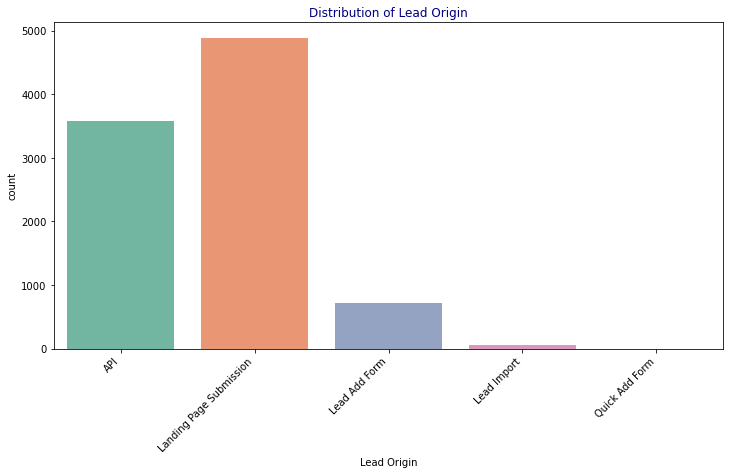

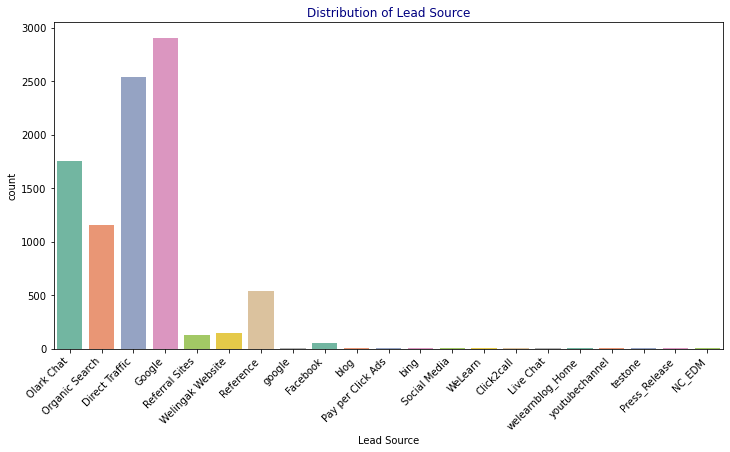

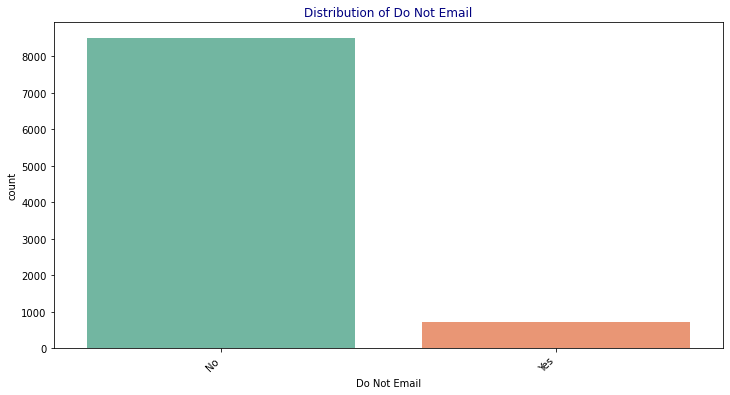

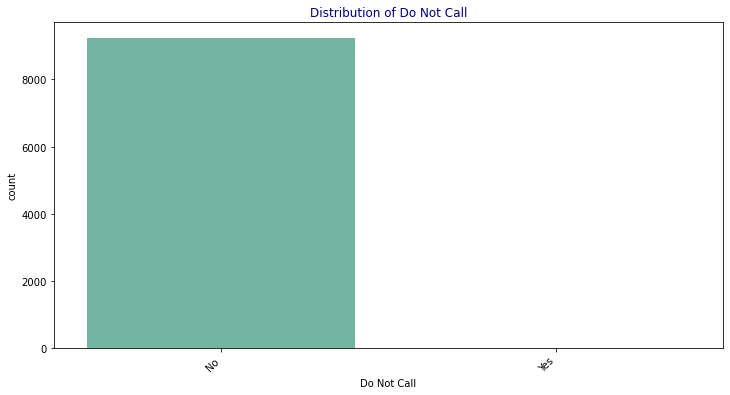

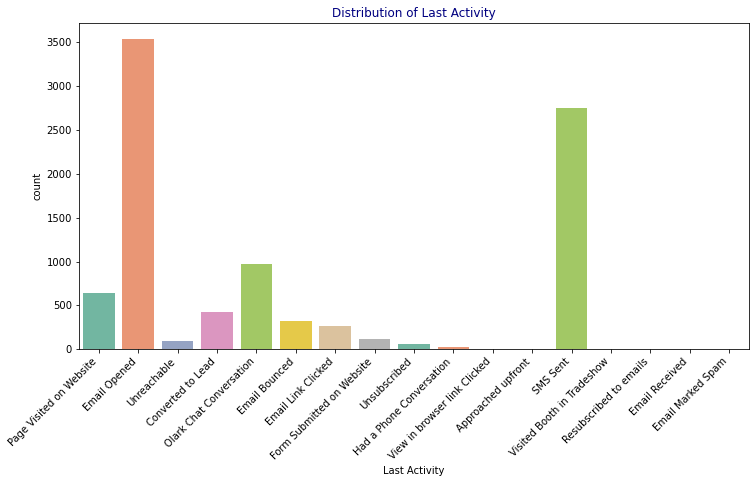

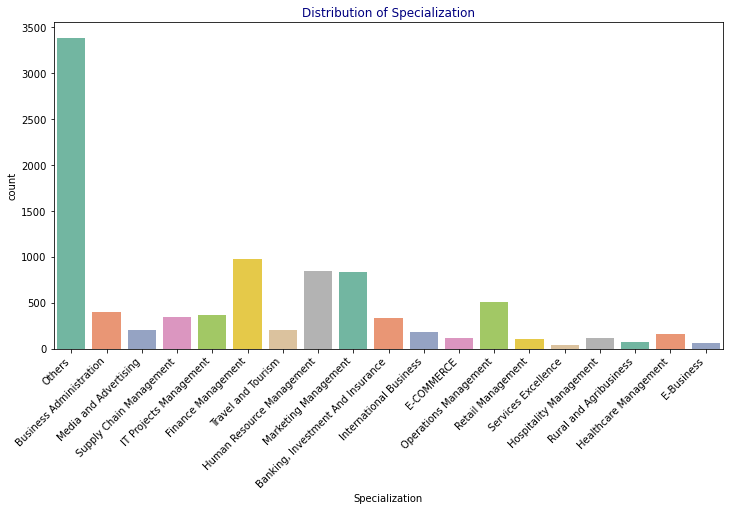

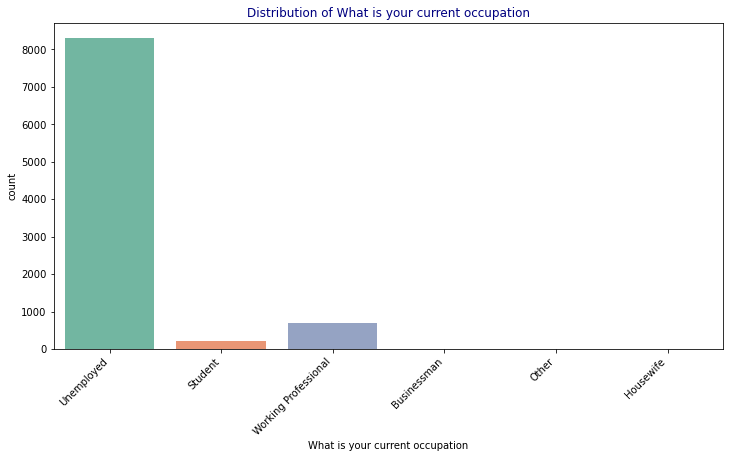

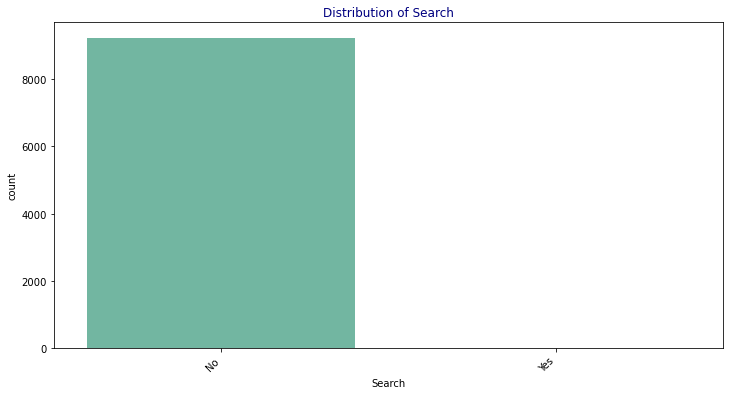

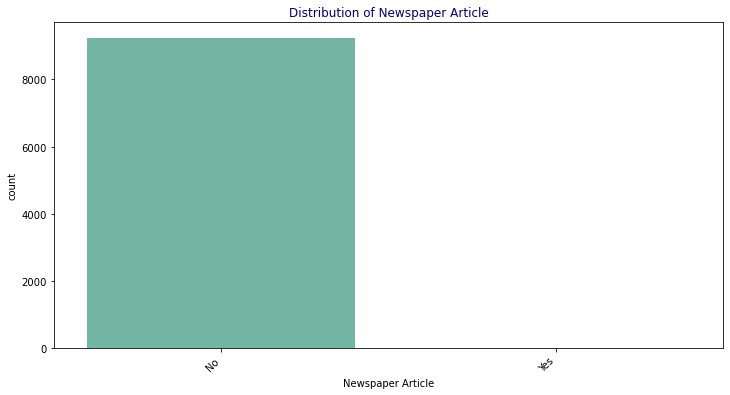

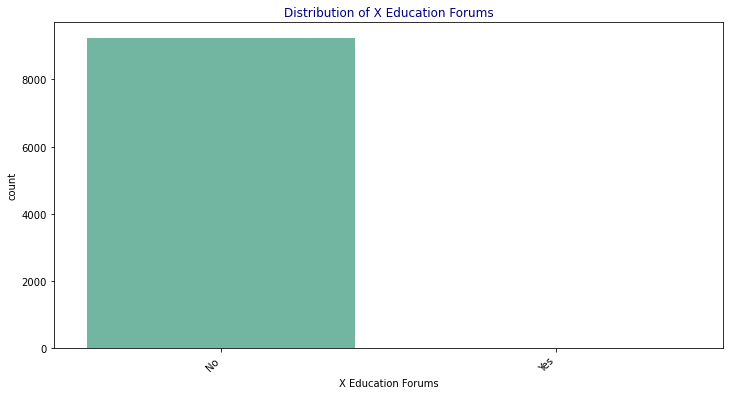

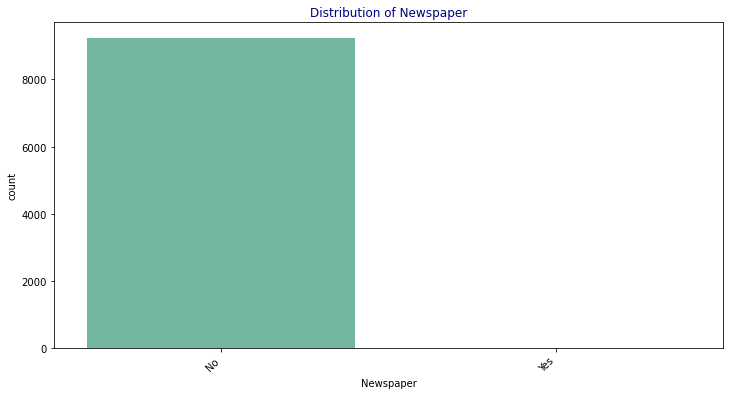

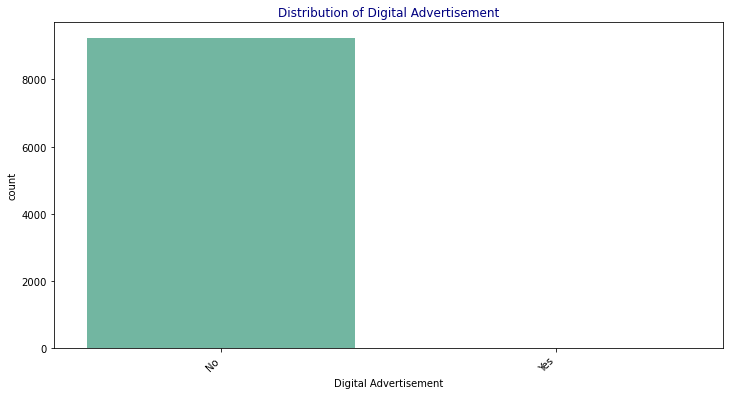

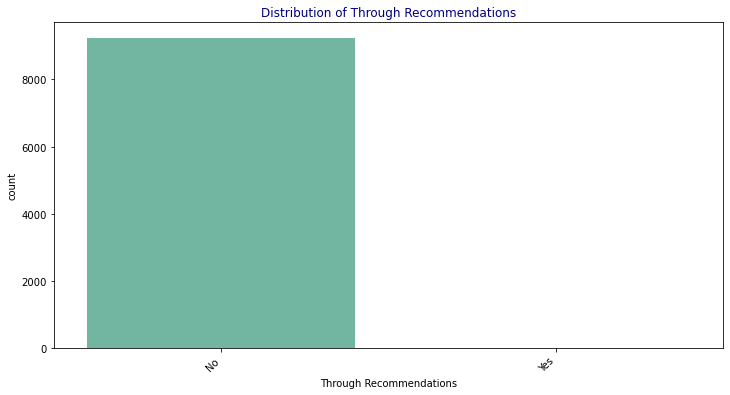

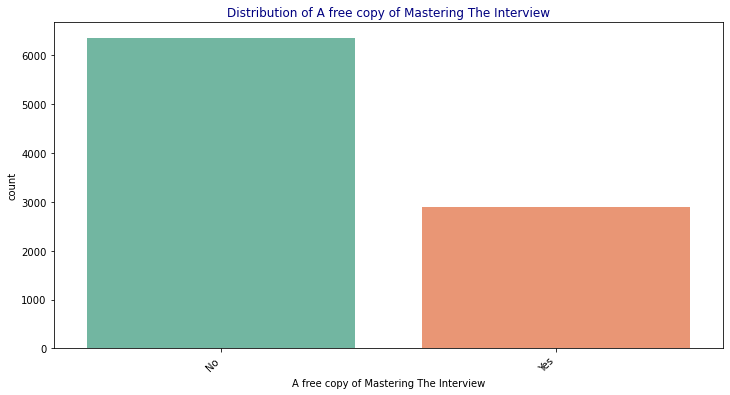

In [23]:
# Check for highly skewed columns and drop them

object_columns = leads_data.select_dtypes(include=['category', 'object']).columns.tolist()

for column in object_columns:
    plt.figure(figsize=[12, 6])
    plt.title(f"Distribution of {column}", color='navy')
    sns.countplot(x=column, data=leads_data, palette='Set2')
    total = len(leads_data[column])
    plt.xticks(rotation=45, ha='right', fontsize=10)
    for p in plt.gca().patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        plt.gca().annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='white')

plt.show()

##### Columns with highly skewed data, such as 'Do Not Call,' 'Search,' 'Newspaper Article,' 'X Education Forums,' 'Newspaper,' 'Digital Advertisement,' and 'Through Recommendations,' may introduce bias in logistic regression models, impacting their performance.
 

In [24]:
# Drop columns with highly skewed data

skewed_columns = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']
leads_data.drop(columns=skewed_columns, inplace=True)
print(leads_data.shape)

(9240, 11)


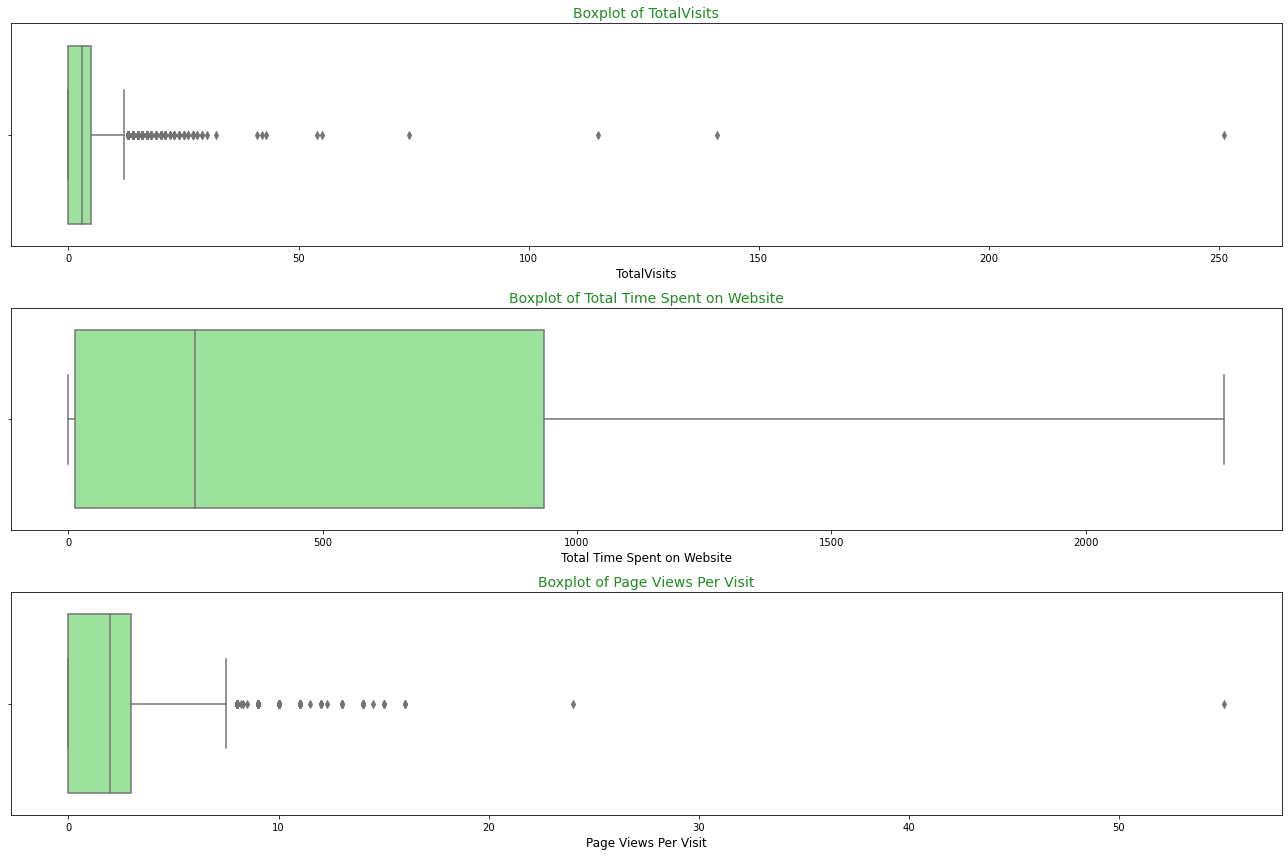

In [25]:
# Outlier Analysis 

numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(18, 12), facecolor='white')

for index, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 1, index)
    sns.boxplot(x=leads_data[column], color='lightgreen')
    plt.title(f"Boxplot of {column}", fontsize=14, color='forestgreen')
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

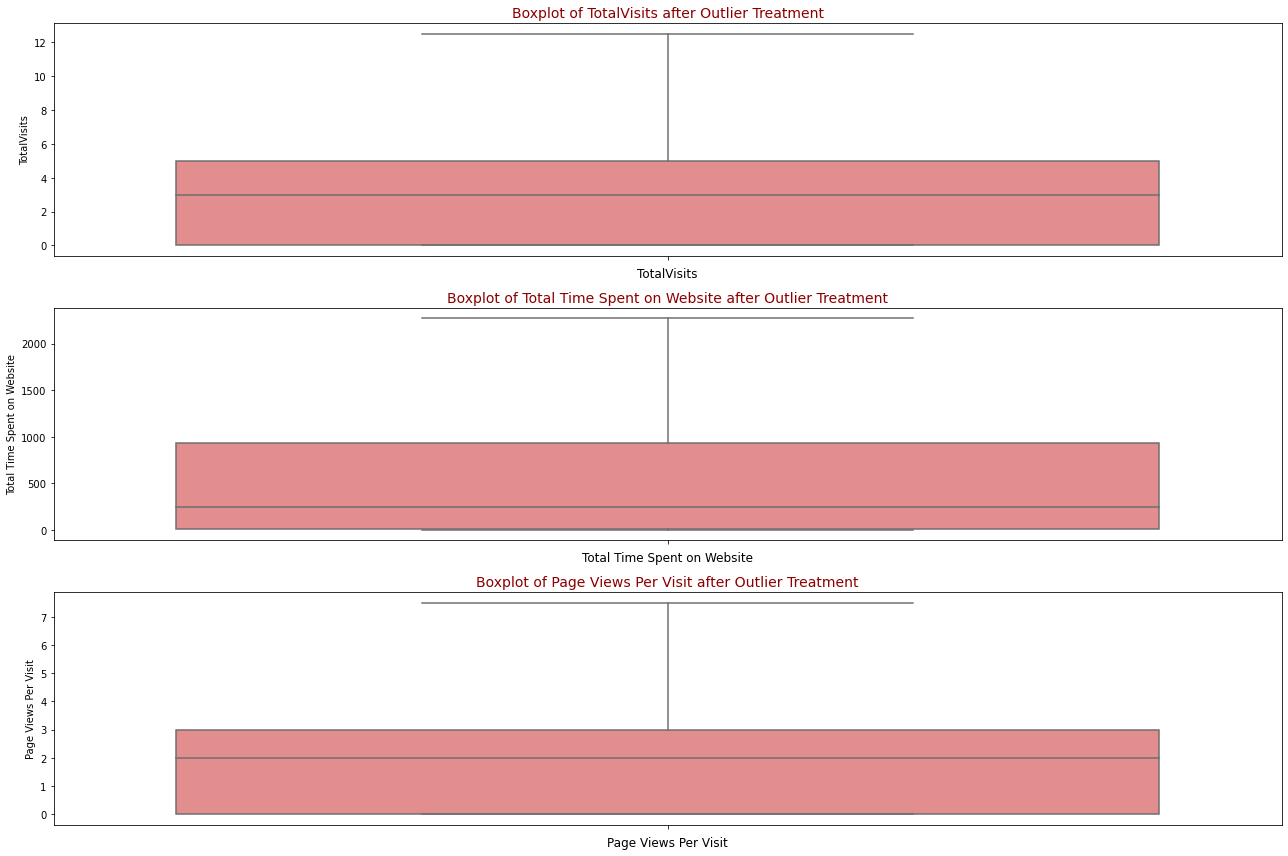

In [26]:
# Define a function to treat outliers via capping and flooring
def treat_outliers(column):
    q1 = leads_data[column].describe()["25%"]
    q3 = leads_data[column].describe()["75%"]
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    
    # Capping upper_bound
    leads_data[column] = np.where(leads_data[column] > upper_bound, upper_bound, leads_data[column])
    # Flooring lower_bound
    leads_data[column] = np.where(leads_data[column] < lower_bound, lower_bound, leads_data[column])

# Apply the function to treat outliers
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for col in numerical_columns:
    treat_outliers(col)

# Checking outliers after treating
plt.figure(figsize=(18, 12), facecolor='white')
for index, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 1, index)
    sns.boxplot(y=leads_data[column], color='lightcoral')
    plt.title(f"Boxplot of {column} after Outlier Treatment", fontsize=14, color='darkred')
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

In [27]:
# Data Standardization - Checking unique categorical variables

categorical_columns = ["Lead Origin", "Lead Source", "Last Activity", "Specialization"]

for column in categorical_columns:
    unique_categories = leads_data[column].value_counts(normalize=True) * 100
    print(f"Unique Categories in {column.upper()}:\n")
    print(unique_categories, "\n")
    print("=" * 80, "\n")

Unique Categories in LEAD ORIGIN:

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 


Unique Categories in LEAD SOURCE:

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64 


Unique Categories in

##### In the 'Lead Score' and 'Last Activity' columns, there are some categories with very few records. To simplify the analysis, we'll group these less common categories together as "Others." Additionally, in the 'Lead Source' column, we'll make the case consistent, treating "Google" and "google" as the same for clarity.

In [28]:
# Group low-frequency values into "Others" in 'Lead Source' column

leads_data['Lead Source'].replace({"bing": "Others", "Click2call": "Others", "Press_Release": "Others","Social Media": "Others", "Live Chat": "Others", "youtubechannel": "Others","testone": "Others", "Pay per Click Ads": "Others", "welearnblog_Home": "Others","WeLearn": "Others", "blog": "Others", "NC_EDM": "Others"}, inplace=True)

# Group low-frequency values into "Others" in 'Last Activity' column

leads_data['Last Activity'].replace({'Unreachable': 'Others', 'Unsubscribed': 'Others','Had a Phone Conversation': 'Others', 'Approached upfront': 'Others','View in browser link Clicked': 'Others', 'Email Marked Spam': 'Others','Email Received': 'Others', 'Visited Booth in Tradeshow': 'Others','Resubscribed to emails': 'Others'}, inplace=True)

# Standardize 'google' to 'Google' in 'Lead Source' column

leads_data['Lead Source'] = leads_data['Lead Source'].str.capitalize()

# After Data Standardization

columns_to_check = ["Lead Origin", "Lead Source", "Last Activity", "Specialization"]
for column in columns_to_check:
    unique_categories = 100 * leads_data[column].value_counts(normalize=True)
    print(f"Unique Categories in {column.upper()}:\n")
    print(unique_categories, "\n")
    print("=" * 80, "\n")


Unique Categories in LEAD ORIGIN:

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 


Unique Categories in LEAD SOURCE:

Google              31.482684
Direct traffic      27.521645
Olark chat          18.993506
Organic search      12.489177
Reference            5.779221
Welingak website     1.536797
Referral sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64 


Unique Categories in LAST ACTIVITY:

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Ac

In [29]:
# Rename columns using a dictionary

columns_to_rename = {'A free copy of Mastering The Interview': 'Free_Copy',
                     'What is your current occupation': 'Current_Occupation'}

leads_data.rename(columns=columns_to_rename, inplace=True)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_Copy
0,API,Olark chat,No,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic search,No,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct traffic,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct traffic,No,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,No


In [30]:
# Map binary categorical variables using apply and lambda

binary_columns = ['Do Not Email', 'Free_Copy']
leads_data[binary_columns] = leads_data[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Free_Copy
0,API,Olark chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,0


### Data Analysis

In [31]:
# Univariate Analysis of Categorical Variables

categorical_variable_columns = ['Lead Origin', 'Current_Occupation', 'Do Not Email','Free_Copy', 'Lead Source', 'Last Activity', 'Specialization']

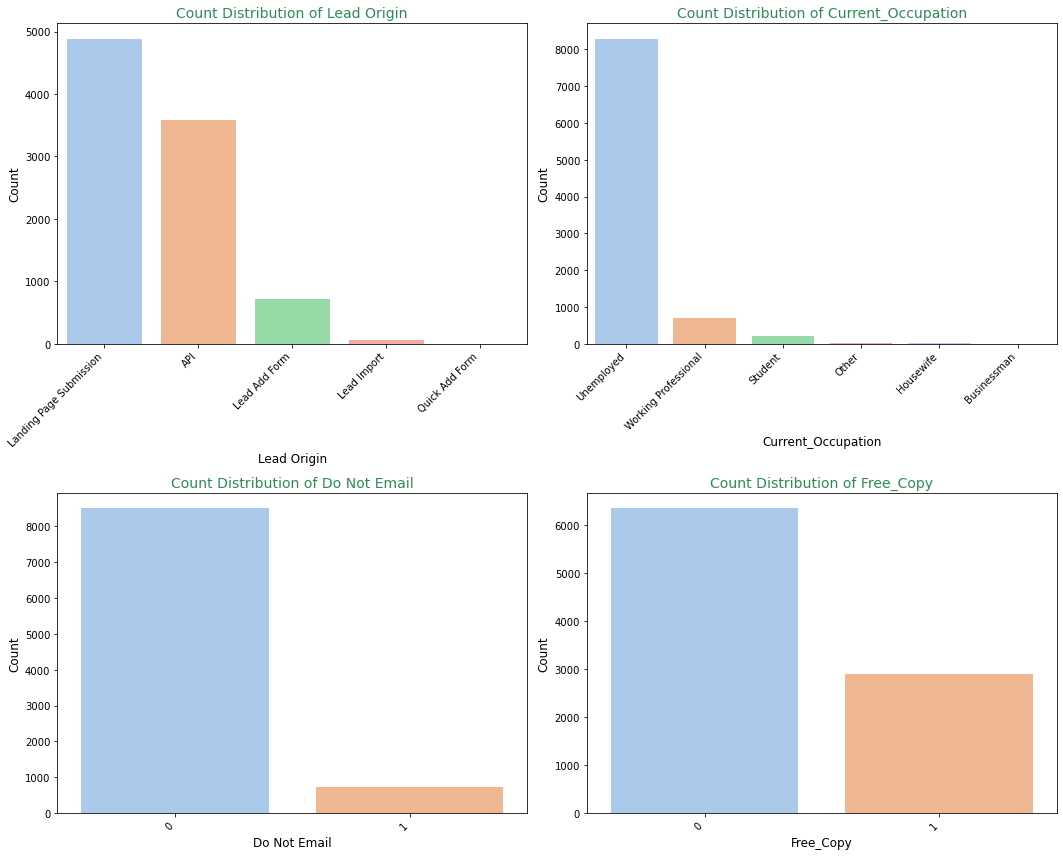

In [32]:
# Univariate Analysis of Categorical Variables 

plt.figure(figsize=[15, 12], facecolor='white')

for i, column in enumerate(categorical_variable_columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=leads_data[column].value_counts().index, y=leads_data[column].value_counts(), palette='pastel')
    plt.title(f"Count Distribution of {column}", color='seagreen', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

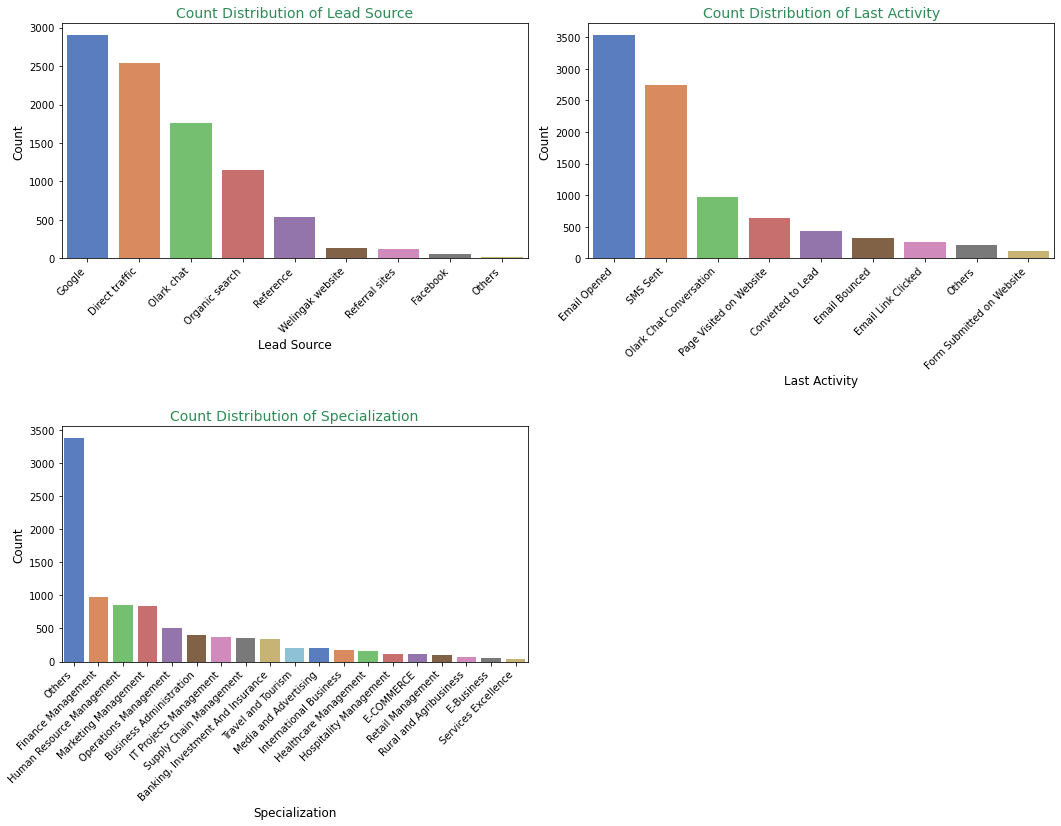

In [33]:
plt.figure(figsize=[15, 15], facecolor='white')

for i, column in enumerate(categorical_variable_columns[4:], 1):
    plt.subplot(3, 2, i)
    sns.barplot(y=leads_data[column].value_counts(), x=leads_data[column].value_counts().index, palette='muted')
    plt.title(f"Count Distribution of {column}", color='seagreen', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

##### Most leads, 52.9%, come from 'Landing Page Submission', while 38.7% are through 'API'. A significant 89.7% of customers are unemployed. The majority, 92.1%, prefer not to receive course-related emails. Google is the primary lead source at 31.5%, and Direct Traffic follows at 27.5%. For the last activity, 38.3% opened an email, and 29.7% sent an SMS. In Specialization, 'Others' is dominant at 36.6%, with Finance, HR, Marketing, and Operations following at 10.6%, 9.2%, 9.1%, and 5.4%, respectively.


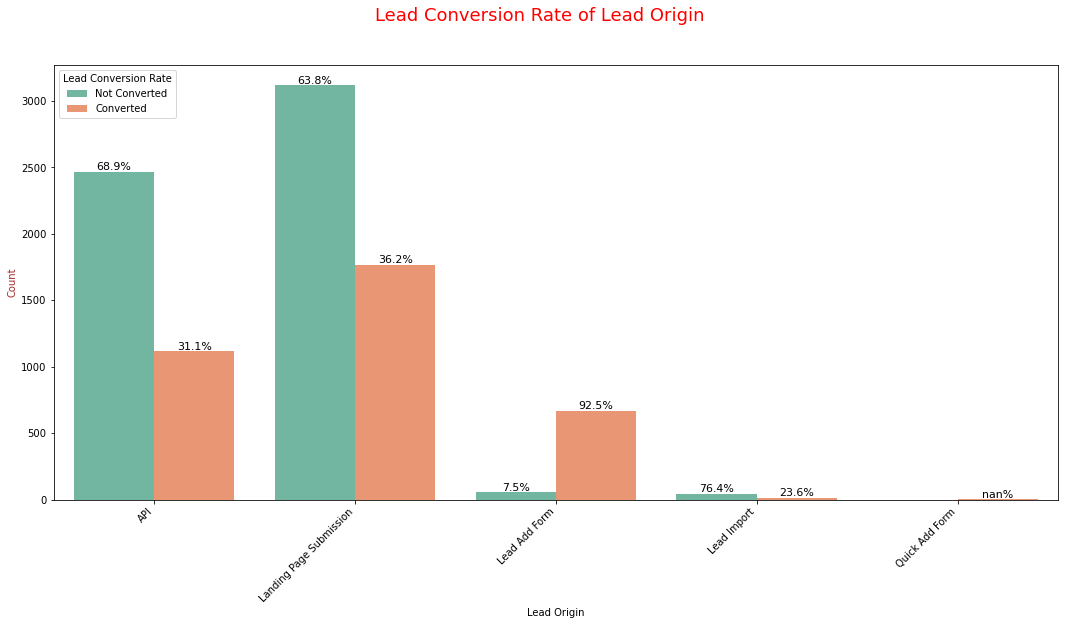

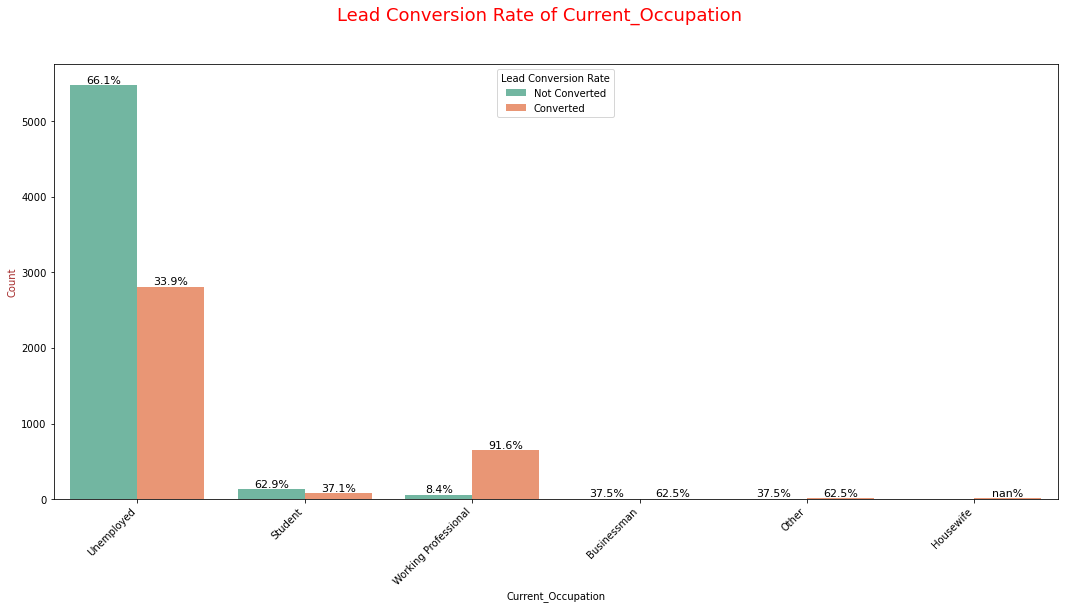

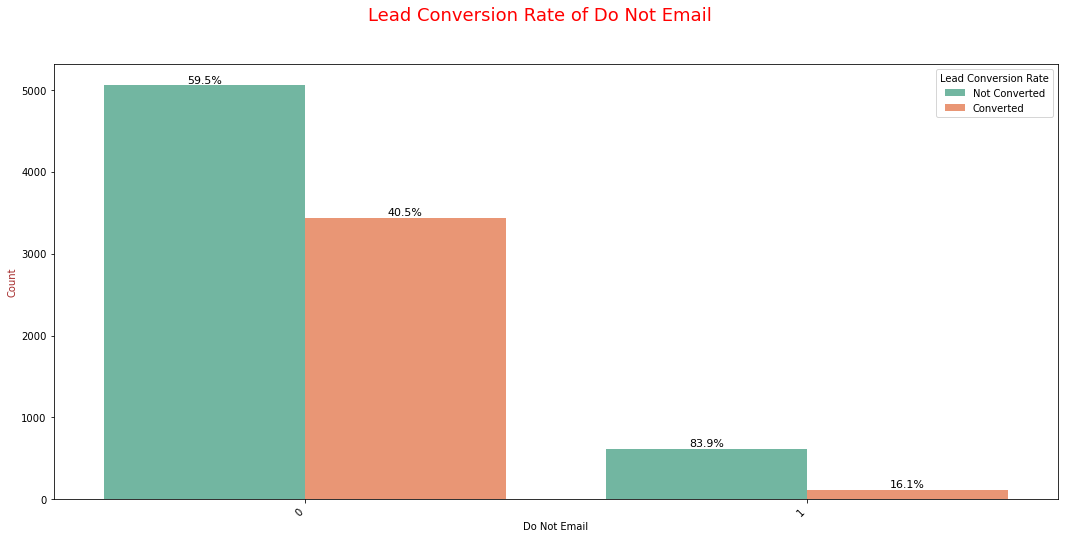

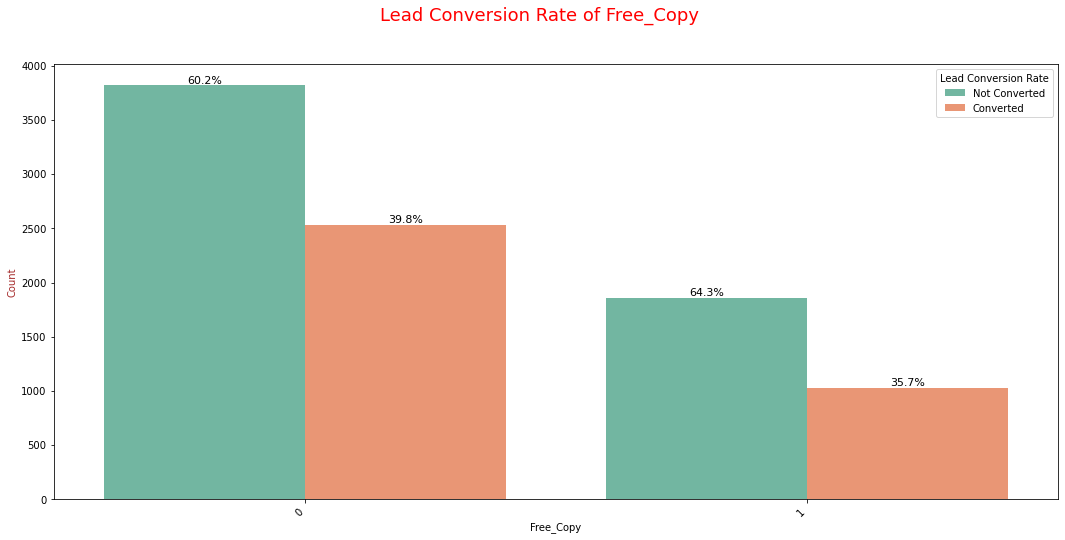

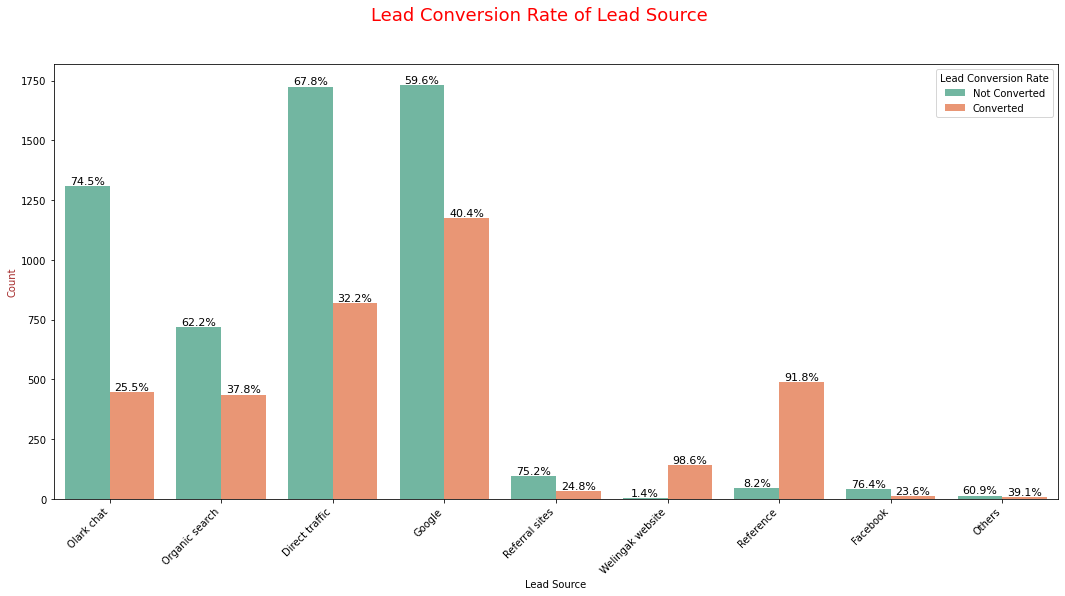

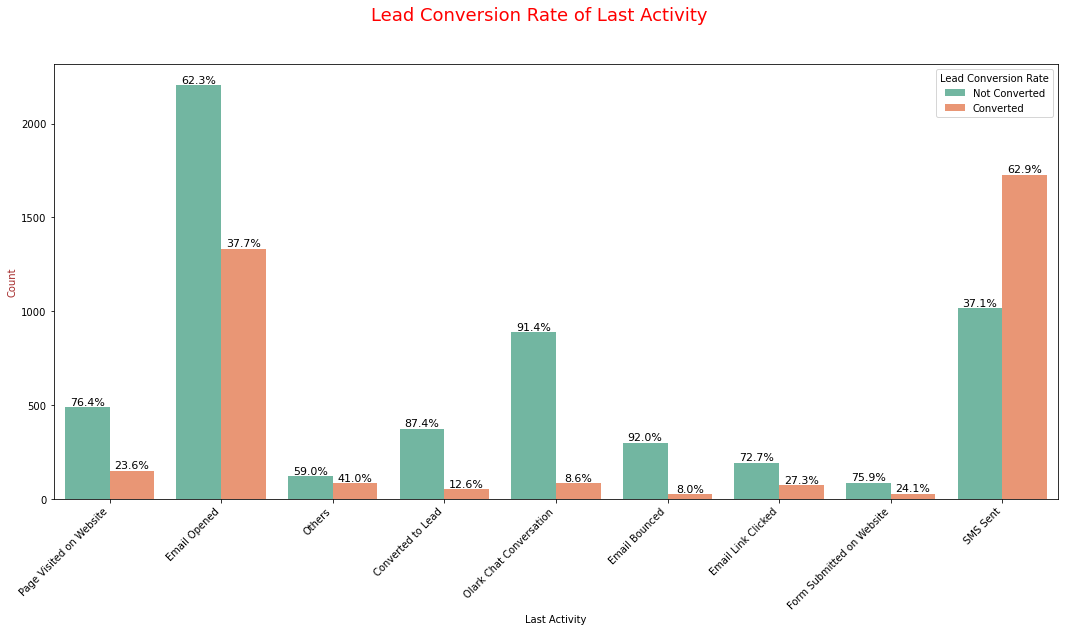

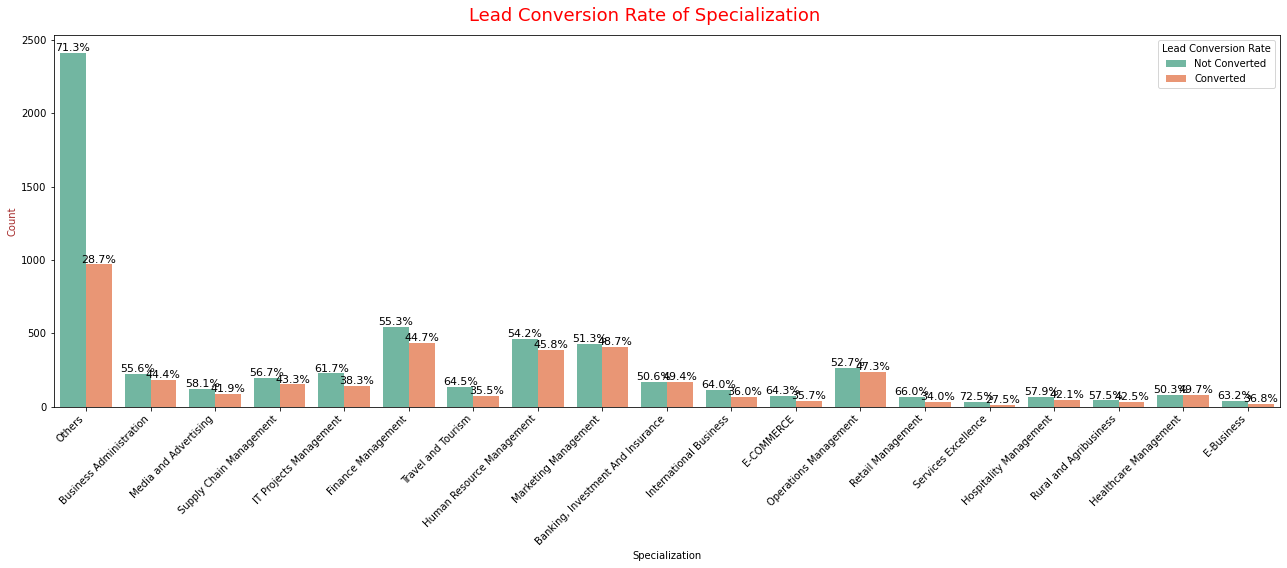

In [34]:
# Bivariate Analysis of Categorical Variables 

def bivariate_analysis(dataframe, var_name, target="Converted"):
    plt.figure(figsize=(18, 8))
    plt.suptitle(f"Lead Conversion Rate of {var_name}", color="red", fontsize=18)

    ax = sns.countplot(x=var_name, hue=target, data=dataframe, palette="Set2")

    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count", color='brown')
    plt.xlabel(f"{var_name}")
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")

    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total):.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

# List of categorical variable columns

categorical_variable_columns = ['Lead Origin', 'Current_Occupation', 'Do Not Email',
                                 'Free_Copy', 'Lead Source', 'Last Activity', 'Specialization']

# Calling Bivariate Analysis function 

for column in categorical_variable_columns:
    bivariate_analysis(leads_data, var_name=column)

plt.tight_layout()
plt.show()


##### In analyzing the lead conversion rates (LCR) for various factors, it is evident that 'Landing Page Submission' is the most successful lead origin, achieving a conversion rate of 36.2%. Working professionals show a significantly higher LCR at 91.6% compared to unemployed individuals at 33.9%. Google stands out as the most effective lead source with a conversion rate of 40.4%, followed by Direct Traffic and Organic Search. Interestingly, although Reference has the highest LCR at 91.8%, it contributes to only 5.8% of customers. SMS Sent and Email Opened are the most effective last activity types with LCRs of 62.9% and 37.7%, respectively. Regarding specialization, Marketing Management, HR Management, Finance Management, and Operations Management all exhibit good LCRs, indicating strong customer interest in these areas. 

<Figure size 720x432 with 0 Axes>

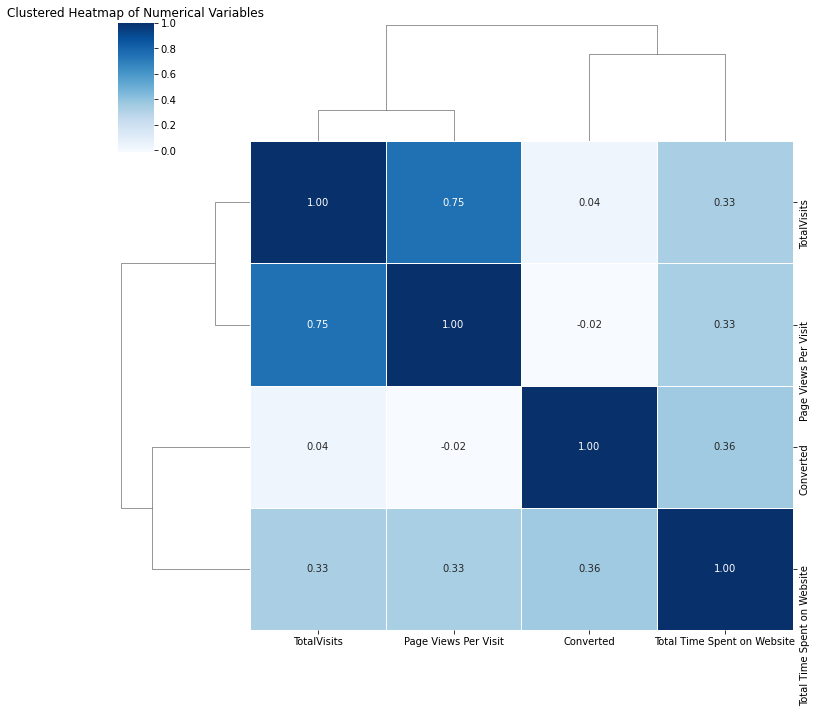

In [35]:
# Bivariate Analysis of Numerical Variables 

numerical_variable_columns = ['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Clustered Heatmap of Numerical Variables
plt.figure(figsize=(10, 6))
sns.clustermap(data=leads_data[numerical_variable_columns].corr(), cmap="Blues", annot=True, fmt=".2f", linewidths=.5)
plt.title("Clustered Heatmap of Numerical Variables")
plt.show()

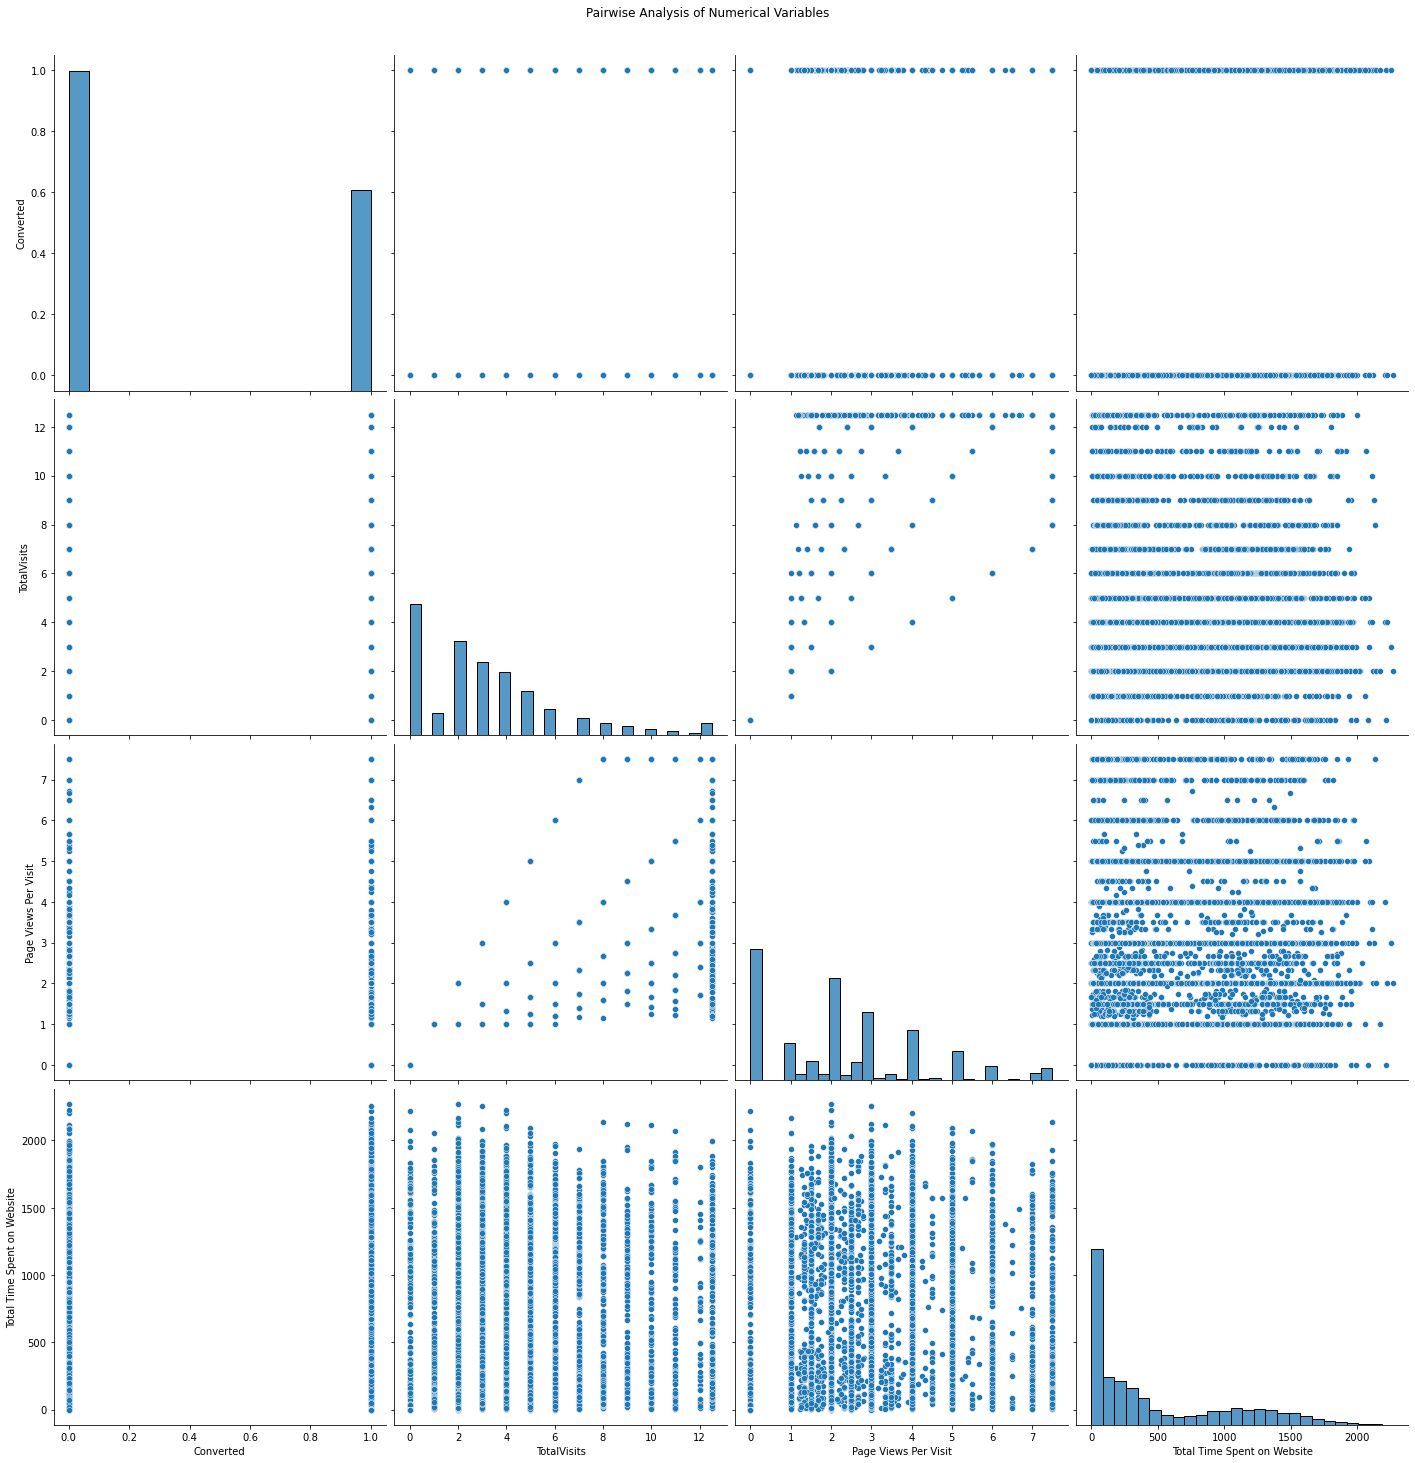

In [36]:
# Bivariate Analysis of Numerical Variables 

numerical_variable_columns = ['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

#Checking numerical variables by pair plots to see if any of the variables have similar behavior

sns.pairplot(leads_data[numerical_variable_columns], height=5)
plt.suptitle("Pairwise Analysis of Numerical Variables", y=1.02)
plt.show()

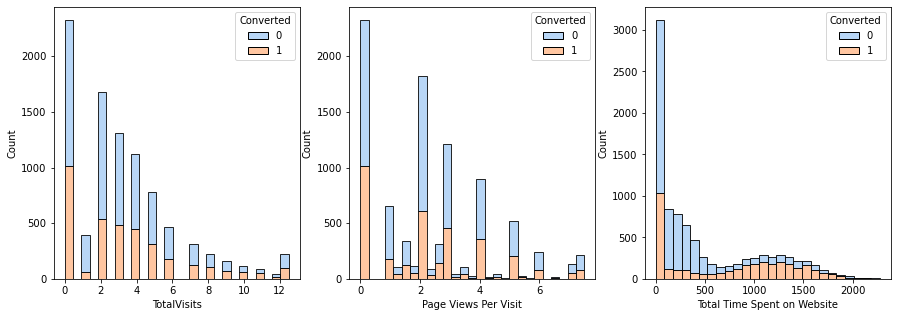

In [37]:
# Stacked Barplots with Converted as Hue for Numerical Variables

plt.figure(figsize=(15,5))

# Stacked Barplot for TotalVisits

plt.subplot(1, 3, 1)
sns.histplot(data=leads_data, x='TotalVisits', hue='Converted', multiple="stack", palette='pastel')

# Stacked Barplot for Page Views Per Visit

plt.subplot(1, 3, 2)
sns.histplot(data=leads_data, x='Page Views Per Visit', hue='Converted', multiple="stack", palette='pastel')

# Stacked Barplot for Total Time Spent on Website

plt.subplot(1, 3, 3)
sns.histplot(data=leads_data, x='Total Time Spent on Website', hue='Converted', multiple="stack", palette='pastel')

plt.show()

##### Customers who visit the website more often tend to view more pages per visit, showing a strong positive correlation between these two factors. Additionally, spending more time on the website is positively correlated with a higher Lead Conversion Rate (LCR), suggesting that customers who invest more time on the site are more likely to convert.

### Data Preparation

In [38]:
# Create dummy variables for all categorical variables
# Creating dummy variables for 5 categorical columns, excluding the first category

dummy_columns = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current_Occupation']], drop_first=True)

# Adding the dummy columns to the master dataframe

leads_data = pd.concat([leads_data, dummy_columns], axis=1)

# Displaying the first few rows of the updated dataset

leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
0,API,Olark chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# Drop original columns after creating dummy variables

columns_to_drop = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current_Occupation']
leads_data = leads_data.drop(columns=columns_to_drop)
leads_data.shape

(9240, 49)

In [40]:
# Separating predictor variables (X) and target variable (y)

X = leads_data.drop('Converted', axis=1)
y = leads_data['Converted']

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Displaying the shapes of the training and testing sets

print("Training set - X:", X_train.shape, " y:", y_train.shape)
print("Testing set - X:", X_test.shape, " y:", y_test.shape)

Training set - X: (6468, 48)  y: (6468,)
Testing set - X: (2772, 48)  y: (2772,)


In [41]:
# Feature Scaling using Standard Scaler

scaler = StandardScaler()

# Selecting numerical columns for scaling

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scaling the numerical features in the training set

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Displaying the X_train dataframe after standard scaling

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# Checking the Lead Conversion Rate (LCR) for 'Converted' Target Variable

conversion_rate = round((sum(leads_data['Converted']) / len(leads_data['Converted'].index)) * 100, 2)
print('Lead Conversion Rate (LCR) =', conversion_rate)

Lead Conversion Rate (LCR) = 38.54


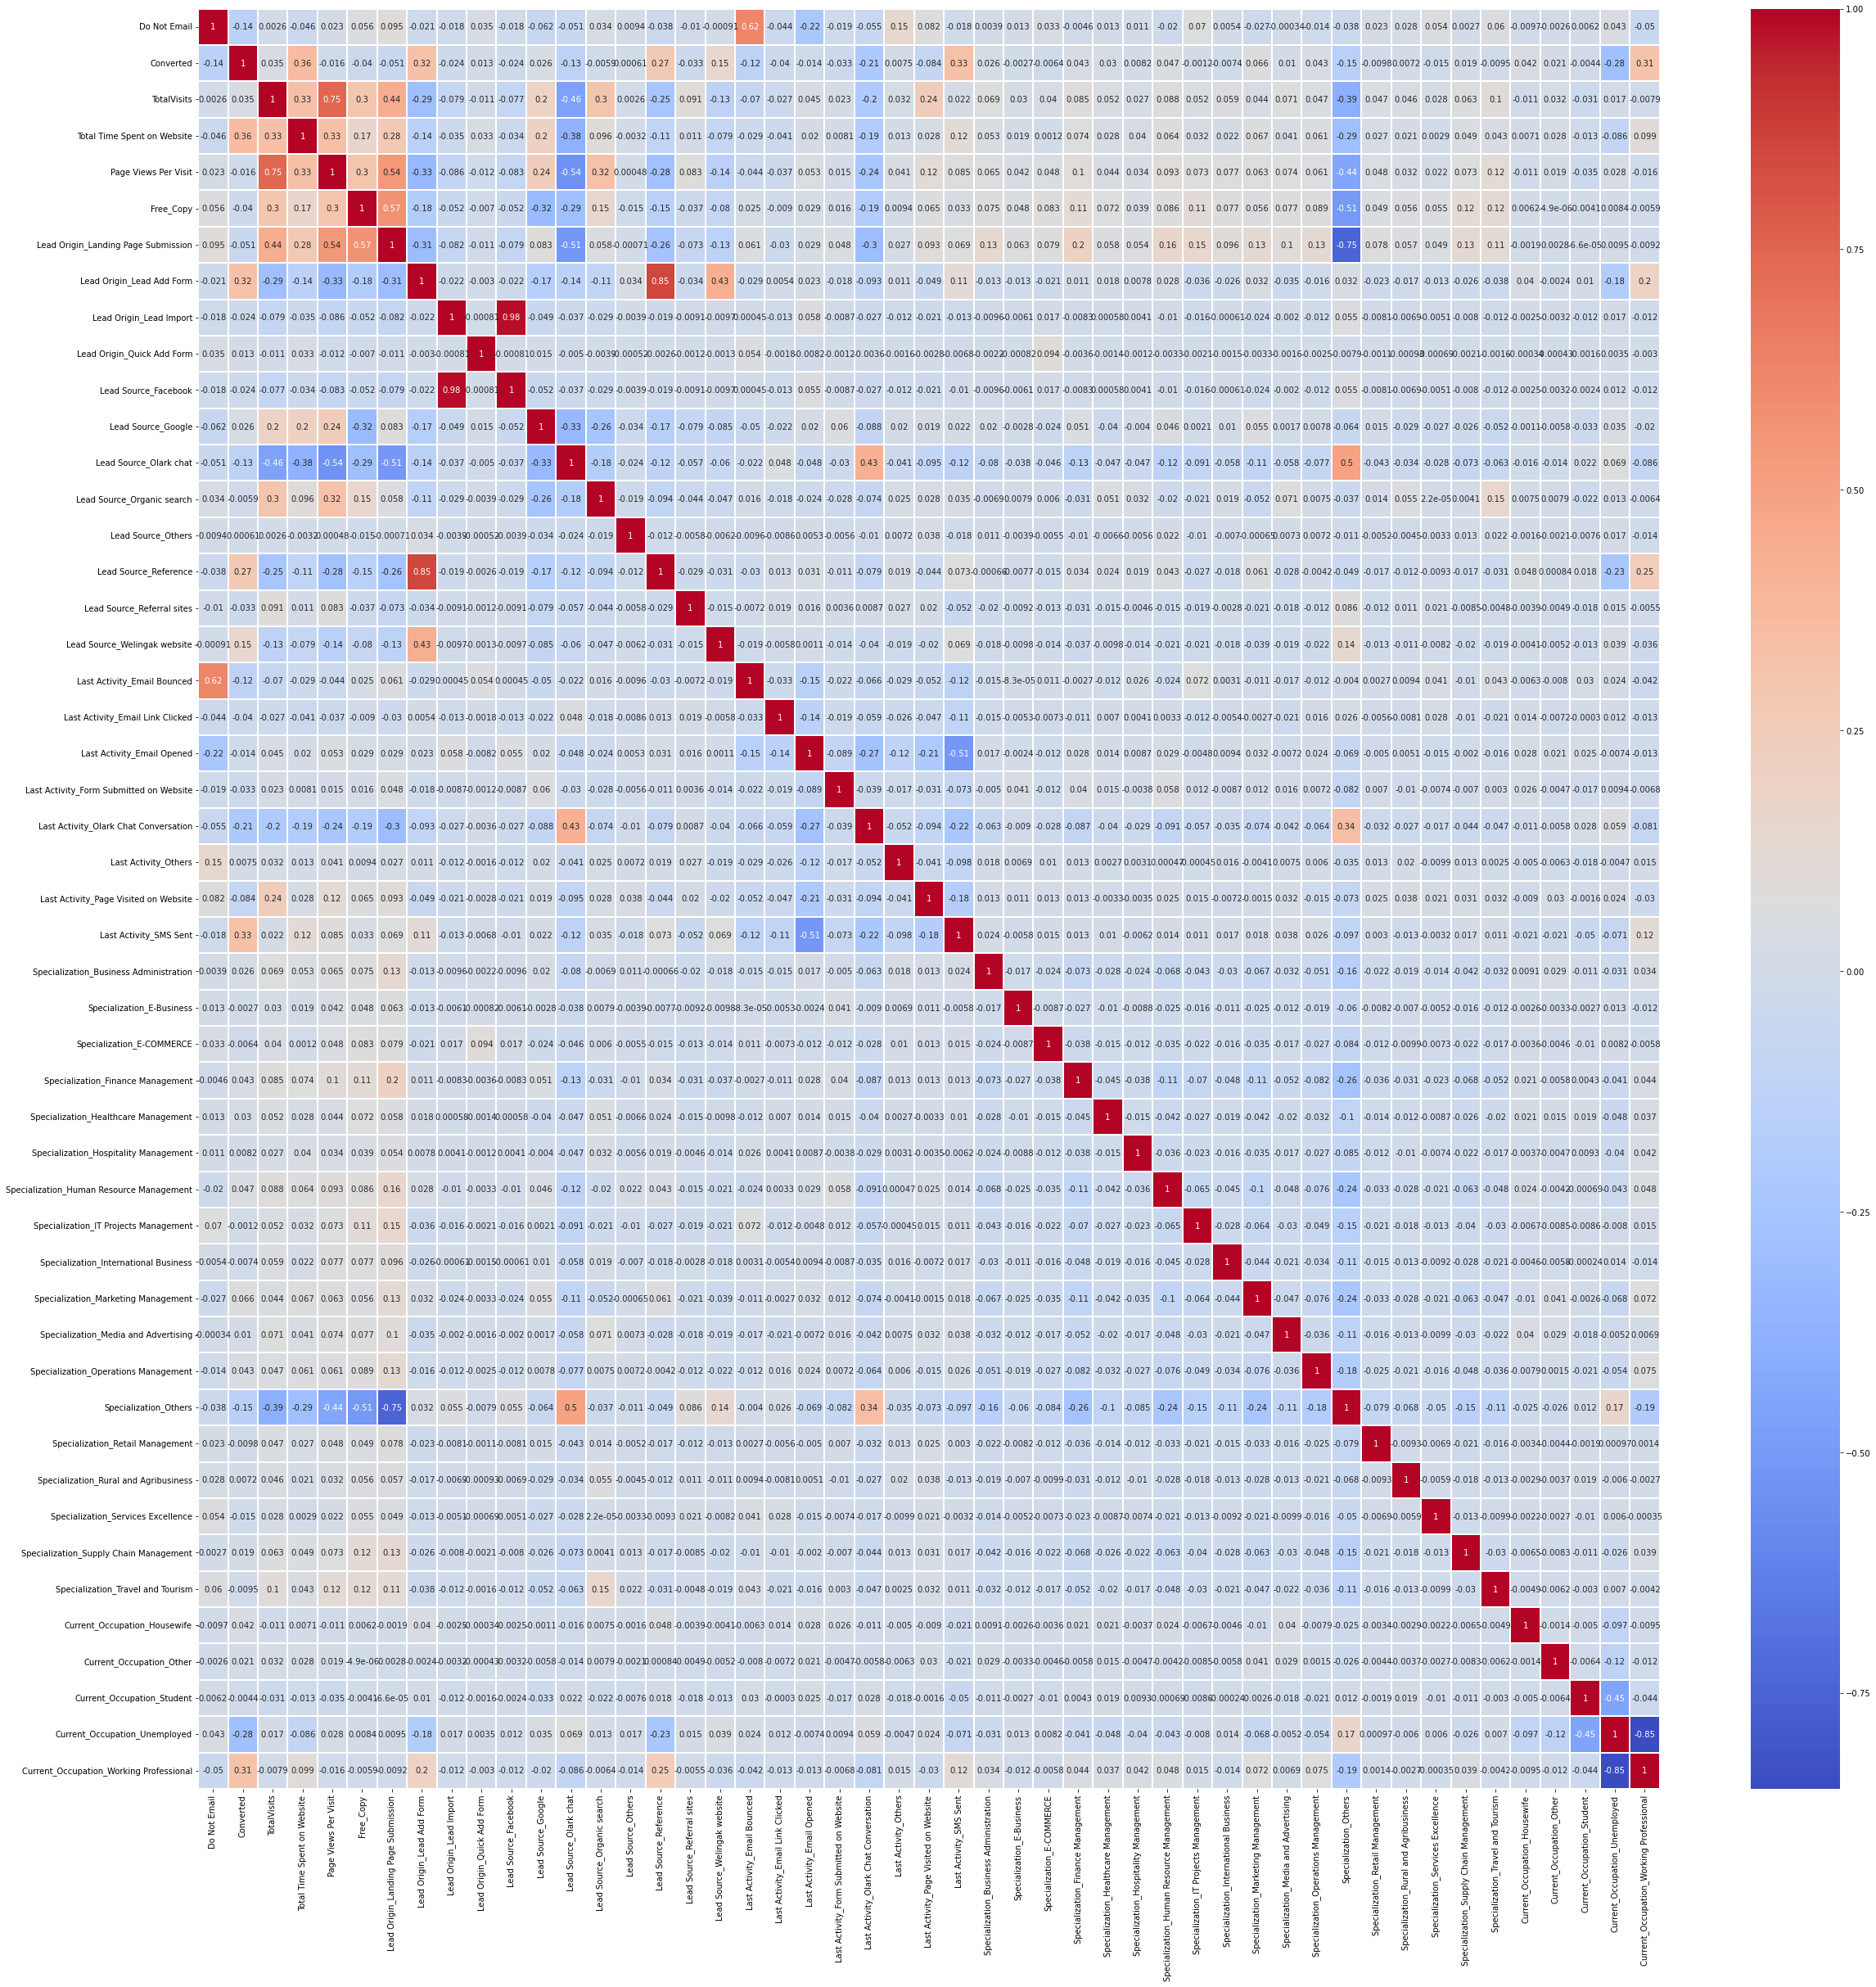

In [43]:
# Examining the correlation matrix

plt.figure(figsize=(40,40))
sns.heatmap(leads_data.corr(), linewidths=0.01, cmap="coolwarm", annot=True)
plt.show()

<Figure size 720x432 with 0 Axes>

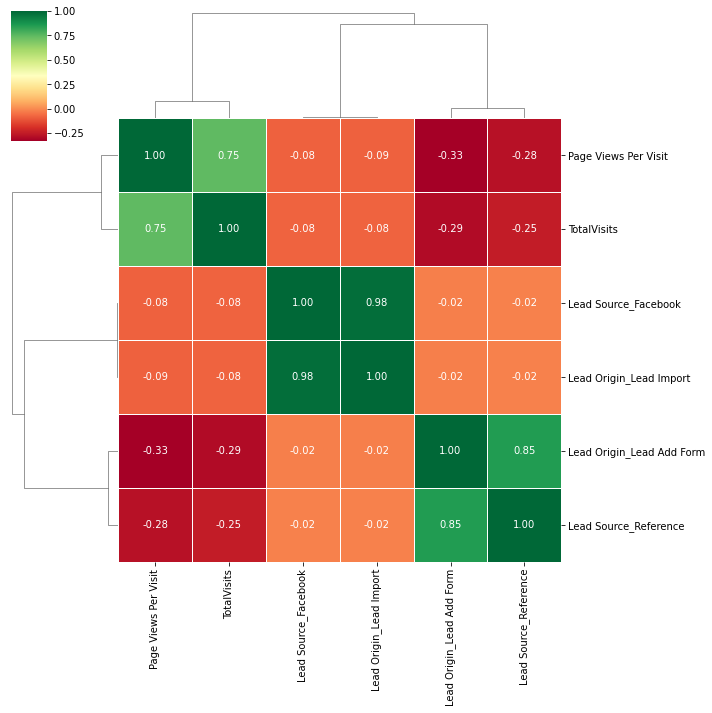

In [44]:
# Visualizing correlation between specific variables

selected_vars = ['Lead Source_Facebook', 'Lead Origin_Lead Import', 'Lead Origin_Lead Add Form', 'Lead Source_Reference','Page Views Per Visit', 'TotalVisits']

plt.figure(figsize=(10, 6))
sns.clustermap(data=leads_data[selected_vars].corr(), cmap="RdYlGn", annot=True, fmt=".2f", linewidths=.5)
plt.show()

##### 'Lead Origin_Lead Import' has a very strong connection with 'Lead Source_Facebook,' indicated by a correlation of 0.98. Similarly, 'Lead Origin_Lead Add Form' is highly correlated with 'Lead Source_Reference,' with a correlation coefficient of 0.85. This suggests a close relationship between these variables, meaning that if one is dropped, it may not substantially impact the overall model performance.

In [45]:
# Exclude the columns 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' from both the training and testing datasets:

columns_to_exclude = ['Lead Origin_Lead Import', 'Lead Origin_Lead Add Form']
X_test = X_test.drop(columns=columns_to_exclude)
X_train = X_train.drop(columns=columns_to_exclude)

### Building Models 

In [46]:
# Performing feature selection using Recursive Feature Elimination (RFE) with logistic regression:

# Initializing logistic regression model
logreg = LogisticRegression()

# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

# Displaying selected features
list(zip(X_train.columns, rfe.support_))

[('Do Not Email', False),
 ('TotalVisits', False),
 ('Total Time Spent on Website', True),
 ('Page Views Per Visit', False),
 ('Free_Copy', False),
 ('Lead Origin_Landing Page Submission', True),
 ('Lead Origin_Quick Add Form', False),
 ('Lead Source_Facebook', True),
 ('Lead Source_Google', False),
 ('Lead Source_Olark chat', True),
 ('Lead Source_Organic search', False),
 ('Lead Source_Others', True),
 ('Lead Source_Reference', True),
 ('Lead Source_Referral sites', False),
 ('Lead Source_Welingak website', True),
 ('Last Activity_Email Bounced', False),
 ('Last Activity_Email Link Clicked', False),
 ('Last Activity_Email Opened', True),
 ('Last Activity_Form Submitted on Website', False),
 ('Last Activity_Olark Chat Conversation', True),
 ('Last Activity_Others', True),
 ('Last Activity_Page Visited on Website', False),
 ('Last Activity_SMS Sent', True),
 ('Specialization_Business Administration', False),
 ('Specialization_E-Business', False),
 ('Specialization_E-COMMERCE', False),


In [47]:
# Checking the top 15 features selected by RFE:

# Create a DataFrame to display RFE results
RFETable = pd.DataFrame({
    'Variable Name': X_train.columns,
    'Variable Chosen': rfe.support_,
    'Ranking': rfe.ranking_
})

# Sort the DataFrame by ranking
RFETable.sort_values(by='Ranking', inplace=True)

# Display the sorted DataFrame
RFETable

,Variable Name,Variable Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,Current_Occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [48]:
# Logistic Regression Model - 1: Assessing the model with StatsModels for detailed statistics.

# Columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Housewife',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [49]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Sun, 19 Nov 2023   Deviance:                       5465.5
Time:                        15:36:39   Pearson chi2:                 8.09e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                 1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                       -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark chat                      0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                          0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                       2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak website                5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                  0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation      -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                        1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                      2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management      -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_Others                      -1.1937      0.121     -9.841      0.000      -1.431      -0.956
Current_Occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_Occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
===========================================================================================================
"""

##### We are excluding the 'Current_Occupation_Housewife' column from our model because its p-value is higher (0.99) than the accepted threshold of 0.05, which indicates that it is not statistically significant. Removing this column helps improve the model's accuracy and reliability in predicting lead conversions.

In [50]:
# Excluding 'Current_Occupation_Housewife' from the selected columns
rfe_col = rfe_col.drop('Current_Occupation_Housewife')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [51]:
# Logistic Regression Model - 2
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Creating and fitting the logistic regression model
LRMod2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()

# Displaying the summary of the logistic regression model
LRMod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Sun, 19 Nov 2023   Deviance:                       5480.7
Time:                        15:36:39   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0251      0.144     -7.111      0.000      -1.308      -0.743
Total Time Spent on Website                 1.0494      0.039     27.177      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2674      0.126    -10.030      0.000      -1.515      -1.020
Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187      -1.733       0.339
Lead Source_Olark chat                      0.8991      0.119      7.580      0.000       0.667       1.132
Lead Source_Others                          0.9739      0.512      1.902      0.057      -0.030       1.977
Lead Source_Reference                       2.9171      0.215     13.538      0.000       2.495       3.339
Lead Source_Welingak website                5.3791      0.729      7.384      0.000       3.951       6.807
Last Activity_Email Opened                  0.9490      0.105      9.077      0.000       0.744       1.154
Last Activity_Olark Chat Conversation      -0.5583      0.187     -2.985      0.003      -0.925      -0.192
Last Activity_Others                        1.2482      0.238      5.238      0.000       0.781       1.715
Last Activity_SMS Sent                      2.0588      0.108     19.151      0.000       1.848       2.270
Specialization_Hospitality Management      -1.0795      0.324     -3.334      0.001      -1.714      -0.445
Specialization_Others                      -1.1978      0.121     -9.881      0.000      -1.435      -0.960
Current_Occupation_Working Professional     2.6773      0.190     14.068      0.000       2.304       3.050
===========================================================================================================
"""

##### Taking into account statistical significance, the 'Lead Source_Facebook' column is removed from the model because it has a higher p-value of 0.187, exceeding the accepted threshold of 0.05.

In [52]:
# Dropping 'Lead Source_Facebook' column
rfe_col = rfe_col.drop('Lead Source_Facebook')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_Occupation_Working Professional'],
      dtype='object')

In [53]:
# Logistic Regression Model - 3
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sun, 19 Nov 2023   Deviance:                       5482.6
Time:                        15:36:39   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0405      0.144     -7.245      0.000      -1.322      -0.759
Total Time Spent on Website                 1.0518      0.039     27.262      0.000       0.976       1.127
Lead Origin_Landing Page Submission        -1.2493      0.125     -9.958      0.000      -1.495      -1.003
Lead Source_Olark chat                      0.9169      0.118      7.773      0.000       0.686       1.148
Lead Source_Others                          0.9814      0.512      1.917      0.055      -0.022       1.985
Lead Source_Reference                       2.9372      0.215     13.661      0.000       2.516       3.359
Lead Source_Welingak website                5.3967      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9434      0.105      9.028      0.000       0.739       1.148
Last Activity_Olark Chat Conversation      -0.5582      0.187     -2.984      0.003      -0.925      -0.192
Last Activity_Others                        1.2487      0.238      5.239      0.000       0.782       1.716
Last Activity_SMS Sent                      2.0555      0.107     19.124      0.000       1.845       2.266
Specialization_Hospitality Management      -1.0904      0.323     -3.377      0.001      -1.723      -0.458
Specialization_Others                      -1.1943      0.121     -9.873      0.000      -1.431      -0.957
Current_Occupation_Working Professional     2.6757      0.190     14.063      0.000       2.303       3.049
===========================================================================================================
"""

##### Eliminating the 'Lead Source_Others' column from the model as it exhibits a higher p-value (0.055), surpassing the accepted threshold of 0.05 for statistical significance. 

In [54]:
# Dropping 'Lead Source_Others' column
rfe_col = rfe_col.drop('Lead Source_Others')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark chat', 'Lead Source_Reference',
       'Lead Source_Welingak website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_Occupation_Working Professional'],
      dtype='object')

In [55]:
# Logistic Regression Model - 4
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Sun, 19 Nov 2023   Deviance:                       5486.1
Time:                        15:36:39   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0236      0.143     -7.145      0.000      -1.304      -0.743
Total Time Spent on Website                 1.0498      0.039     27.234      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2590      0.125    -10.037      0.000      -1.505      -1.013
Lead Source_Olark chat                      0.9072      0.118      7.701      0.000       0.676       1.138
Lead Source_Reference                       2.9253      0.215     13.615      0.000       2.504       3.346
Lead Source_Welingak website                5.3887      0.728      7.399      0.000       3.961       6.816
Last Activity_Email Opened                  0.9421      0.104      9.022      0.000       0.737       1.147
Last Activity_Olark Chat Conversation      -0.5556      0.187     -2.974      0.003      -0.922      -0.189
Last Activity_Others                        1.2531      0.238      5.259      0.000       0.786       1.720
Last Activity_SMS Sent                      2.0519      0.107     19.106      0.000       1.841       2.262
Specialization_Hospitality Management      -1.0944      0.323     -3.391      0.001      -1.727      -0.462
Specialization_Others                      -1.2033      0.121     -9.950      0.000      -1.440      -0.966
Current_Occupation_Working Professional     2.6697      0.190     14.034      0.000       2.297       3.042
===========================================================================================================
"""

##### The fourth Logistic Regression Model is reliable and suitable for further analysis because all the p-values are below the accepted threshold of 0.05.

In [56]:
# UDF for calculating VIFs for variables

def calculate_vifs(model_df):
    vif_data = pd.DataFrame()
    vif_data["Features"] = model_df.columns
    vif_data["VIF"] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    vif_data["VIF"] = vif_data["VIF"].round(2)
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif_data

# Check VIFs for all variables in Logistic Regression Model - 4
calculate_vifs(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_Occupation_Working Professional,1.21
9,Lead Source_Welingak website,1.08


##### All variables in our logistic regression model have VIF values less than 5, indicating no significant multicollinearity issues. Additionally, all variables in the model have p-values less than 0.05, indicating that they are statistically significant predictors of the outcome variable. Considering these findings, Logistic Regression Model - 4 (LRMod4) has been chosen as the final model for making predictions. We will not consider any other models for further analysis, as LRMod4 exhibits acceptable values for both VIF and p-values.

### Model Evaluation

In [57]:
# Predicting on the Train set
y_train_pred = LRMod4.predict(X_train_sm4)

# Displaying the first 10 predicted values
y_train_pred.head(10)

# Creating a data frame with the actual Converted score and Probability of conversion
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred.values})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


In [58]:
# Mapping the predicted conversion rate based on the probability cutoff of 0.5
y_train_pred_final['Predicted'] = (y_train_pred_final["Converted_Prob"] > 0.5).astype(int)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


In [59]:
# Calculate confusion matrix (Actual / Predicted)
confusion1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])

# UDF for Confusion Matrix Metrics
def calculate_confusion_matrix_metrics(confusion_matrix):
    TP = confusion_matrix[1, 1]  # true positive
    TN = confusion_matrix[0, 0]  # true negatives
    FP = confusion_matrix[0, 1]  # false positives
    FN = confusion_matrix[1, 0]  # false negatives

    accuracy = round((TN + TP) / float(TN + TP + FN + FP), 4)
    sensitivity = round(TP / float(TP + FN), 4)
    specificity = round(TN / float(TN + FP), 4)
    false_positive_rate = round(FP / float(TN + FP), 4)
    precision = round(TP / float(TP + FP), 4)
    recall = round(TP / float(TP + FN), 4)
    negative_predictive_value = round(TN / float(TN + FN), 4)

    return {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'False Positive Rate': false_positive_rate,
        'Precision': precision,
        'Recall': recall,
        'Negative Predictive Value': negative_predictive_value
    }


# Calculate and print confusion matrix metrics
confusion_metrics = calculate_confusion_matrix_metrics(confusion1)
print(confusion_metrics)

{'Accuracy': 0.8052, 'Sensitivity': 0.6569, 'Specificity': 0.8966, 'False Positive Rate': 0.1034, 'Precision': 0.7965, 'Recall': 0.6569, 'Negative Predictive Value': 0.8092}


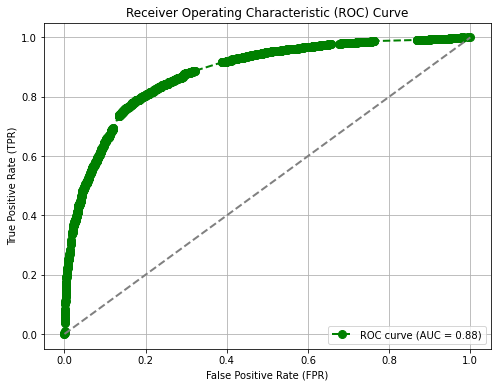

In [60]:
# Function to plot ROC curve 
def plot_roc_curve_custom(actual, predicted_probabilities):
    fpr, tpr, _ = metrics.roc_curve(actual, predicted_probabilities)
    auc_score = metrics.roc_auc_score(actual, predicted_probabilities)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})', marker='o', linestyle='dashed', markersize=8)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Calculate ROC curve and plot 
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])
plot_roc_curve_custom(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])


In [61]:
# Finding the optimal cutoff point by creating columns with different probability cutoffs
cutoff_values = [float(x) / 10 for x in range(10)]
for cutoff in cutoff_values:
    column_name = f'Predicted_{int(cutoff*10)}'
    y_train_pred_final[column_name] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > cutoff else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,Predicted_0,Predicted_1,Predicted_2,Predicted_3,Predicted_4,Predicted_5,Predicted_6,Predicted_7,Predicted_8,Predicted_9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [62]:
# Calculate accuracy, sensitivity, and specificity for various probability cutoffs
cutoff_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cutoff_metrics_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

for cutoff in cutoff_values:
    confusion_matrix_cutoff = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[f'Predicted_{int(cutoff*10)}'])
    total = sum(sum(confusion_matrix_cutoff))
    accuracy = (confusion_matrix_cutoff[0, 0] + confusion_matrix_cutoff[1, 1]) / total
    specificity = confusion_matrix_cutoff[0, 0] / (confusion_matrix_cutoff[0, 0] + confusion_matrix_cutoff[0, 1])
    sensitivity = confusion_matrix_cutoff[1, 1] / (confusion_matrix_cutoff[1, 0] + confusion_matrix_cutoff[1, 1])
    cutoff_metrics_df.loc[cutoff] = [cutoff, accuracy, sensitivity, specificity]

print(cutoff_metrics_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


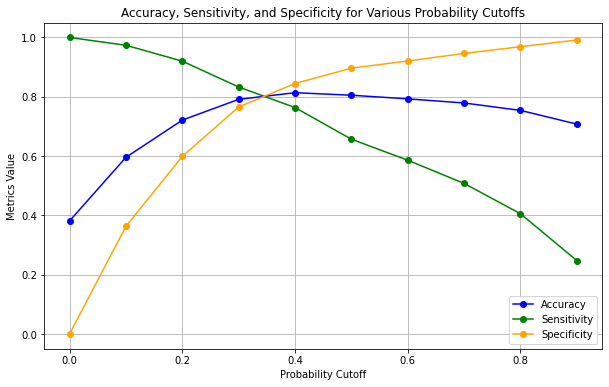

In [63]:
# Plotting accuracy, sensitivity, and specificity for various probabilities 
plt.figure(figsize=(10, 6))

plt.plot(cutoff_metrics_df['prob'], cutoff_metrics_df['accuracy'], marker='o', linestyle='-', color='blue', label='Accuracy')
plt.plot(cutoff_metrics_df['prob'], cutoff_metrics_df['sensi'], marker='o', linestyle='-', color='green', label='Sensitivity')
plt.plot(cutoff_metrics_df['prob'], cutoff_metrics_df['speci'], marker='o', linestyle='-', color='orange', label='Specificity')

plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics Value')
plt.title('Accuracy, Sensitivity, and Specificity for Various Probability Cutoffs')
plt.legend()
plt.grid(True)
plt.show()


##### Analyzing the curve, it is recommended to set the cutoff probability at around 0.35 for optimal classification.

In [64]:
# Using the optimal cutoff probability of 0.35 for final predictions
y_train_pred_final['final_predicted'] = (y_train_pred_final['Converted_Prob'] > 0.35).astype(int)

# Dropping unnecessary columns
columns_to_drop = ['Predicted_0','Predicted_1','Predicted_2','Predicted_3','Predicted_4','Predicted_5','Predicted_6','Predicted_7','Predicted_8','Predicted_9', 'Predicted']
y_train_pred_final.drop(columns=columns_to_drop, inplace=True)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


In [65]:
confusion_train = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion_train)

[[3245  757]
 [ 500 1966]]


In [66]:
confusion_metrics_2 = calculate_confusion_matrix_metrics(confusion_train)
print(confusion_metrics_2)

{'Accuracy': 0.8057, 'Sensitivity': 0.7972, 'Specificity': 0.8108, 'False Positive Rate': 0.1892, 'Precision': 0.722, 'Recall': 0.7972, 'Negative Predictive Value': 0.8665}


In [67]:
# Precision and Recall Metrics
precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])
precision_score_value = precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
recall_score_value = recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

# Rounding the scores
precision_score_value = round(precision_score_value, 4)
recall_score_value = round(recall_score_value, 4)

print('Precision Score =', precision_score_value)
print('Recall Score    =', recall_score_value)

Precision Score = 0.722
Recall Score    = 0.7972


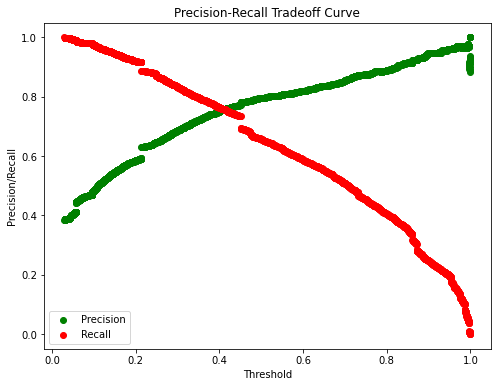

In [68]:
# Creating precision-recall tradeoff curve
precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

# Plotting precision-recall tradeoff curve as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(thresholds, precision[:-1], color='green', label='Precision', marker='o')
plt.scatter(thresholds, recall[:-1], color='red', label='Recall', marker='o')

# Adding legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall Tradeoff Curve')

plt.show()


##### The precision-recall curve suggests that a threshold of 0.4 achieves a favorable equilibrium between precision and recall.







In [69]:
# Scaling numerical variables in the test set
num_var_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test[num_var_cols] = scaler.transform(X_test[num_var_cols])

# Selecting variables based on RFE in the test set
X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark chat,Lead Source_Reference,Lead Source_Welingak website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_Occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


In [70]:
# Adding a constant value to the test set
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

# Making predictions using Logistic Regression Model - 4
y_test_pred = LRMod4.predict(X_test_sm)

# Displaying the top 10 predictions
y_test_pred.head(10)

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [71]:
# Converting the predicted probabilities to a dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [72]:
# Converting y_test to a DataFrame
y_test_df = pd.DataFrame(y_test, columns=['Converted'])
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [73]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [74]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [75]:
# Taking sensitivity-specificity method at 0.35 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


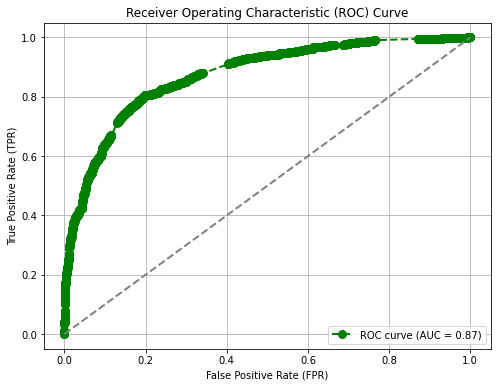

In [76]:
# Drawing ROC curve for the Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate=False)
auc_score = metrics.roc_auc_score(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})', marker='o', linestyle='dashed', markersize=8)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [77]:
# Calculate and print the confusion matrix for the Test Set
confusion_matrix_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(confusion_matrix_test)

[[1359  318]
 [ 227  868]]


In [78]:
calculate_confusion_matrix_metrics(confusion_matrix_test)

{'Accuracy': 0.8034,
 'Sensitivity': 0.7927,
 'Specificity': 0.8104,
 'False Positive Rate': 0.1896,
 'Precision': 0.7319,
 'Recall': 0.7927,
 'Negative Predictive Value': 0.8569}

In [79]:
# Adding Lead Score to the Test dataframe
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].apply(lambda x: round(x * 100))
y_pred_final.head(10)

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87
5,9186,1,0.503859,1,50
6,1631,1,0.419681,1,42
7,8963,1,0.154531,0,15
8,8007,0,0.072344,0,7
9,5324,1,0.298849,0,30


In [80]:
# Sorting the Test dataframe by Lead Score in descending order
y_pred_final = y_pred_final.sort_values(by='Lead_Score', ascending=False)
y_pred_final

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1026,5671,1,0.998942,1,100
1239,2489,1,0.996164,1,100
1976,4775,1,0.996645,1,100
196,5793,1,0.996645,1,100
416,2804,1,0.996645,1,100
...,...,...,...,...,...
104,155,0,0.013285,0,1
2712,2577,0,0.014743,0,1
1136,4098,0,0.014996,0,1
597,3682,0,0.013772,0,1


##### Customers who have a higher lead score are more likely to convert, while those with a lower lead score are less likely to convert.







### Conclusion

#### In the training dataset, the model achieved an accuracy of 80.57%, indicating the overall correctness of predictions. The sensitivity, measuring the model's ability to correctly identify positive cases, stood at 79.72%, while the specificity, indicating the model's accuracy in identifying negative cases, was 81.08%.

#### For the test dataset, the model exhibited an accuracy of 80.34%. The sensitivity for this set, denoting the model's effectiveness in correctly identifying positive instances, was 79.27%, and the specificity, representing the model's accuracy in recognizing negative instances, reached 81.04%. These metrics collectively assess the performance of the model on both the training and test datasets. 

#### Certain factors, such as using the 'Lead Add Form', being a 'Working Professional', and spending more time on the website, positively influence a higher conversion rate. In particular, individuals employed or unemployed show better conversion rates. Referral leads from existing customers also have notably high conversion rates. Google and Direct Traffic channels appear promising for conversions. Additionally, leads engaged through 'SMS Sent' or 'Email Opened' tend to convert more. The most common specialization category is 'Others', followed by Finance Management, HR Management, and Marketing Management.




